Скачайте датасет fifаs2.сsv. Проанализируйте его и определите, какие данные являются неполными. Удалите
ненужные колонки и недостающие значения.

In [11]:
import pandas as pd

df = pd.read_csv('fifa_s2.csv')

In [12]:
missing_values = df.isnull().sum()
print("Статистика недостающих значений:")
print(missing_values)

Статистика недостающих значений:
ID                            0
Name                          0
Age                           0
Nationality                   7
Overall                       0
Potential                     0
Club                        241
Value                       257
Wage                          0
Preferred Foot                0
International Reputation     10
Skill Moves                   6
Position                     21
Joined                        0
Contract Valid Until        273
Height                        0
Weight                        0
Release Clause                3
dtype: int64


In [13]:
total_values = df.shape[0]
missing_percentage = (missing_values / total_values) * 100
print("Процент отсутствующих значений в каждой колонке:")
print(missing_percentage)

Процент отсутствующих значений в каждой колонке:
ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.291788
Overall                      0.000000
Potential                    0.000000
Club                        10.045852
Value                       10.712797
Wage                         0.000000
Preferred Foot               0.000000
International Reputation     0.416840
Skill Moves                  0.250104
Position                     0.875365
Joined                       0.000000
Contract Valid Until        11.379742
Height                       0.000000
Weight                       0.000000
Release Clause               0.125052
dtype: float64


In [14]:
columns_to_drop = ['Value', 'Contract Valid Until']
df = df.drop(columns=columns_to_drop)

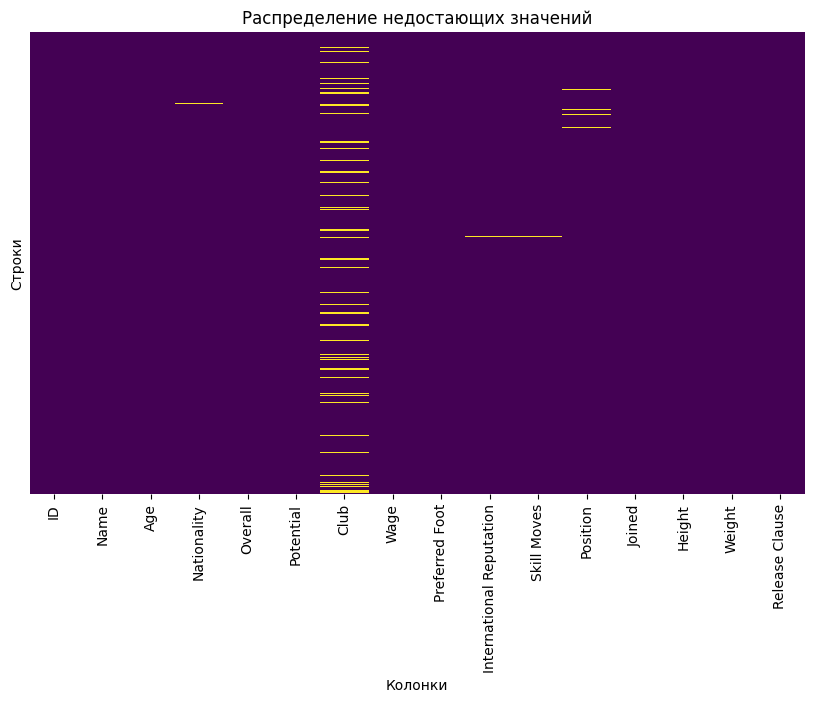

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создание тепловой карты для визуализации недостающих значений
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Распределение недостающих значений')
plt.xlabel('Колонки')
plt.ylabel('Строки')
plt.show()

Найдите в датафрейме полные дубликаты и удалите их. Значения могут быть одинаковыми, но написаны по-разному. Например, может отличаться размер регистра (заглавные и строчные буквы). Особое внимание уделить колонке с названиями команд.

In [16]:
# Подсчет количества встречающихся значений в колонке с названиями команд
team_counts = df['Club'].value_counts()

# Вывод названий команд и соответствующего количества
print("Названия команд и количество их упоминаний:")
print(team_counts)

Названия команд и количество их упоминаний:
Club
Manchester City       33
Arsenal               33
CD Leganés            33
Cardiff City          33
Liverpool             33
                      ..
Fc Barcelona           2
Livingston FC          1
FC Heidenheim 1846     1
Aalborg BK             1
FC Köln                1
Name: count, Length: 81, dtype: int64


In [18]:
# Приведение значений в колонке с названиями команд к нижнему регистру
df['Club'] = df['Club'].str.lower()

# Поиск полных дубликатов в DataFrame с учетом регистра
duplicates = df[df.duplicated()]

# Удаление полных дубликатов из DataFrame
df_cleaned = df.drop_duplicates()


# Вывод информации о найденных дубликатах и обновленном DataFrame
print("Найденные дубликаты:")
print(duplicates)
print("\nDataFrame после удаления дубликатов:")
print(df_cleaned)

Найденные дубликаты:
         ID        Name  Age Nationality  Overall  Potential          Club   
154  168651  I. Rakitić   30     Croatia       87         87  fc barcelona  \
304  181872    A. Vidal   31       Chile       85         85  fc barcelona   

     Wage Preferred Foot  International Reputation  Skill Moves Position   
154   260          Right                       4.0          3.0      RCM  \
304   205          Right                       4.0          3.0      CAM   

     Joined    Height  Weight  Release Clause  
154    2014  6.000000   172.0         95300.0  
304    2018  5.916667   165.0         53300.0  

DataFrame после удаления дубликатов:
          ID           Name  Age  Nationality  Overall  Potential   
0       1179      G. Buffon   40        Italy       88         88  \
1       5479       Casillas   37        Spain       82         82   
2       8205          Braga   35     Portugal       70         70   
3       9014      A. Robben   34  Netherlands       84   

Напишите функцию, которая добавит колонку с разбиением возраста по группам: до 20, от 20 до 30, от 30 до
36 и старше 36. Посчитайте количество футболистов в каждой категории.

In [19]:
def categorize_age(age):
    if age <= 20:
        return 'до 20'
    elif 20 < age <= 30:
        return 'от 20 до 30'
    elif 30 < age <= 36:
        return 'от 30 до 36'
    else:
        return 'старше 36'

# Добавление колонки с категориями возраста
df['age_group'] = df['Age'].apply(categorize_age)

# Подсчет количества футболистов в каждой категории
age_group_counts = df['age_group'].value_counts()

# Вывод количества футболистов в каждой категории
print("Количество футболистов в каждой возрастной группе:")
print(age_group_counts)

Количество футболистов в каждой возрастной группе:
age_group
от 20 до 30    1633
до 20           411
от 30 до 36     340
старше 36        15
Name: count, dtype: int64
